## Diabetes data 다중회귀

1. 선형회귀
2. 서포트벡터머신
3. 랜덤포레스트 리그레서

        각각의 MSE 비교하기

In [40]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [41]:
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


각 피쳐별로 산점도와 선형 회귀

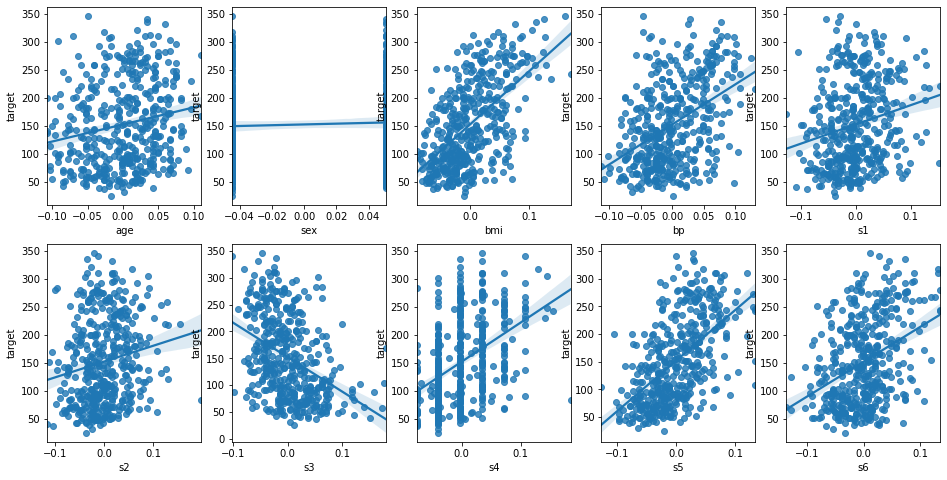

In [9]:
_, axs = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))
for i, feature in enumerate(df.columns[:-1]):
    row, col = i//5, i%5 ##5,5 가 맞나?
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

* 각 피쳐별 R 스퀘어 밸류

In [42]:
from sklearn.linear_model import LinearRegression
y = diabetes.target
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1) #2D 넣어주기 위해 시리즈를 넘파이(밸류), 그걸 열벡터 로 reshape(-1,1) 조커와 1열
    lr = LinearRegression()
    lr.fit(X, y)
    r2=lr.score(X,y)
    print(f'{feature} : {r2:.4f}')

age : 0.0353
sex : 0.0019
bmi : 0.3439
bp : 0.1949
s1 : 0.0450
s2 : 0.0303
s3 : 0.1559
s4 : 0.1853
s5 : 0.3202
s6 : 0.1463


dataset 분리 샘과함께 버전 테스트사이즈 줌

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size = 0.1, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

### Regressor 별 MSE 비교

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [33]:
# 리니어 회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)   # 프레딕트에 와이 테스트 안와
mse_lr = mean_squared_error(y_test, pred_lr)

In [34]:
# SVR
svr = SVR()
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)   # 프레딕트에 와이 테스트 안와
mse_svr = mean_squared_error(y_test, pred_svr)

In [35]:
# 랜덤포레스트
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)   # 프레딕트에 와이 테스트 안와
mse_rfr = mean_squared_error(y_test, pred_rfr)

결과 비교

In [36]:
# mse
print(f'LR:{mse_lr:.4f}, SVR:{mse_svr:.4f}, RF:{mse_rfr:.4f}')

LR:2370.1979, SVR:3960.9367, RF:3558.3609


In [37]:
# rfr안맞네

In [39]:
df = pd.DataFrame({
    'y_test':y_test, 'LR':pred_lr,
    'SVR':pred_svr, 'RFR':pred_rfr 
})
df.head(10)

,y_test,LR,SVR,RFR
0,155.0,156.031216,133.705341,112.42
1,167.0,185.700495,146.907788,151.42
2,185.0,162.863840,140.965960,172.59
3,109.0,162.545441,144.683128,160.66
4,65.0,78.518494,118.088552,85.45
5,77.0,60.600694,124.899794,87.69
6,277.0,175.198247,152.459542,155.85
7,244.0,176.770871,153.097167,172.54
8,148.0,131.425197,121.363033,110.30
9,102.0,88.053772,129.184107,142.48


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=2021
)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

### 1. linear Regression / MSE

In [103]:
# linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
# pred_lr


In [104]:
# lr.coef_, lr.intercept_

In [105]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, pred_lr)
mse_lr
# test size 디폴트 0.2

2614.433258946715

### 2. SVR / MSE

In [106]:
from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error
svc = SVR()
svc.fit(X_train, y_train)
# svc.score(X_test, y_test)
pred_sv = svc.predict(X_test)
mse_sv = mean_squared_error(y_test, pred_sv)
mse_sv

5000.780124125391

### 3. 랜덤포레스트(RandomForestRegressor) / MSE

In [107]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2021)
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test, pred_rfr)
mse_rfr

3562.9448864864867

## MSE 비교

In [108]:
# print(f'MSE비교 선형회귀: {mse_lr:.0f},  SVM: {mse_sv:.0f},  랜덤포레스트: {mse_rfr:.0f}')
print('< MSE비교 >')
print('1 : '  + f'선형회귀: {mse_lr:.0f}')
print('2 : '  + f'SVM: {mse_sv:.0f}')
print('3 : '  + f'랜덤포레스트: {mse_rfr:.0f}')

< MSE비교 >
1 : 선형회귀: 2614
2 : SVM: 5001
3 : 랜덤포레스트: 3563


In [109]:
# 실제값 예측값 비교 #오차가 적었던 선형회귀 모델이 더 잘 예측함
df = pd.DataFrame({
    'y_test':y_test, 'LR':pred_lr,
    'SVR':pred_sv, 'RF':pred_rfr 
})
df.head()

,y_test,LR,SVR,RF
0,155.0,151.164062,131.280232,131.33
1,167.0,184.199159,143.277334,145.36
2,185.0,159.113458,136.705800,164.37
3,109.0,166.497547,142.132496,141.77
4,65.0,75.057884,119.638001,76.39


Q. 성능좋은 랜덤포레스트가 왜 약하지?